# VGG19 Classifier

In [1]:
import numpy as np
import skimage.io as io
import skimage.transform as T
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
from src.util.img_util import normalize, denormalize

In [2]:
shape = 224, 224
model = VGG19()
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Dog

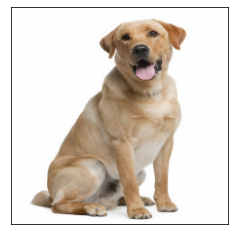

In [3]:
image = io.imread('img/objects/labrador-retriever.jpg')
image = T.resize(image, shape, preserve_range=True).astype('uint8')
ax = plt.imshow(image)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

In [4]:
decode_predictions(model.predict(normalize(image[None, ...].astype(float))), top=5)

[[('n02099712', 'Labrador_retriever', 0.54719615),
  ('n02099601', 'golden_retriever', 0.34676814),
  ('n02090379', 'redbone', 0.009032078),
  ('n04409515', 'tennis_ball', 0.008717379),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.00870364)]]

## Seahorse

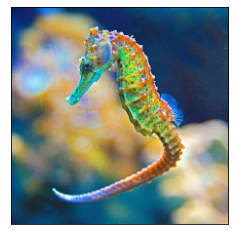

In [5]:
image = io.imread('img/objects/seahorse.jpg')
image = T.resize(image, shape, preserve_range=True).astype('uint8')
ax = plt.imshow(image)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

In [6]:
decode_predictions(model.predict(normalize(image[None, ...].astype(float))), top=5)

[[('n01950731', 'sea_slug', 0.27178589),
  ('n01694178', 'African_chameleon', 0.23433965),
  ('n02317335', 'starfish', 0.20393011),
  ('n01986214', 'hermit_crab', 0.033121508),
  ('n02321529', 'sea_cucumber', 0.031081917)]]

## Oil Tanker

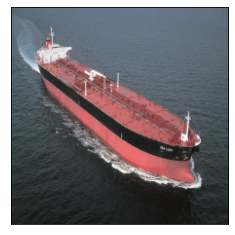

In [7]:
image = io.imread('img/objects/oil-tanker.jpg')
image = T.resize(image, shape, preserve_range=True).astype('uint8')
ax = plt.imshow(image)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

In [8]:
decode_predictions(model.predict(normalize(image[None, ...].astype(float))), top=5)

[[('n03240683', 'drilling_platform', 0.43478853),
  ('n03095699', 'container_ship', 0.2518543),
  ('n03344393', 'fireboat', 0.15093188),
  ('n03662601', 'lifeboat', 0.10689097),
  ('n04273569', 'speedboat', 0.012384306)]]

## Compare Against Keras

In [9]:
from tensorflow.keras.applications.vgg19 import preprocess_input
np.any(preprocess_input(image[None, ...].astype(float)) - normalize(image[None, ...].astype(float)) > 1e-6)

False